# **بسم الله الرحمن الرحيم**

## Lib

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load Data (breast cancer)

In [ ]:
data = datasets.load_breast_cancer()
x, y = data.data, data.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1
)



---


## Desciosoin Tree

In [ ]:
class Node:

    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    
    def is_leaf(self):
      """
      Function is_leaf checks if the node is a leaf node or not.
      :return: True if the node is a leaf (A node is a leaf node if it has a value attribute that is not None).
      """
        
        return self.value is not None


In [ ]:
class MyDecisionTree:

    def __init__(self, max_depth=100, min_samples_split=2):
        # Initialize the decision tree with the given maximum depth and minimum samples required to split.
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None  # root node of the decision tree

    def _is_finished(self, depth):
        # Returns True if the depth of the decision tree exceeds the maximum depth, or if there is only one class label 
        # left in the samples, or if the number of samples is less than the minimum required to split. 
        if (depth >= self.max_depth
            or self.n_class_labels == 1
            or self.n_samples < self.min_samples_split):
            return True
        return False

    def _entropy(self, y):
        # Calculates and returns the entropy of the given class labels.
        proportions = np.bincount(y) / len(y)
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        return entropy

    def _create_split(self, X, thresh):
        # Creates a split based on the given threshold value.
        # Returns the indices of the samples that belong to the left and right splits.
        left_idx = np.argwhere(X <= thresh).flatten()
        right_idx = np.argwhere(X > thresh).flatten()
        return left_idx, right_idx

    def _information_gain(self, X, y, thresh):
        # Calculates and returns the information gain achieved by splitting the samples at the given threshold.
        parent_loss = self._entropy(y)
        left_idx, right_idx = self._create_split(X, thresh)
        n, n_left, n_right = len(y), len(left_idx), len(right_idx)

        if n_left == 0 or n_right == 0: 
            return 0
        
        child_loss = (n_left / n) * self._entropy(y[left_idx]) + (n_right / n) * self._entropy(y[right_idx])
        return parent_loss - child_loss

    def _best_split(self, X, y, features):
        # Finds the best feature and threshold value for splitting the samples based on the maximum information gain.
        split = {'score':- 1, 'feat': None, 'thresh': None}

        for feat in features:
            X_feat = X[:, feat]
            thresholds = np.unique(X_feat)
            for thresh in thresholds:
                score = self._information_gain(X_feat, y, thresh)

                if score > split['score']:
                    split['score'] = score
                    split['feat'] = feat
                    split['thresh'] = thresh

        return split['feat'], split['thresh']

    # Define the `_build_tree` method for recursively building the decision tree
    def _build_tree(self, X, y, depth=0):
        # Compute the number of samples and features in the input data
        self.n_samples, self.n_features = X.shape
        # Compute the number of unique class labels in the output data
        self.n_class_labels = len(np.unique(y))

        # If the depth of the tree exceeds a certain limit, return a leaf node containing the most common class label
        if self._is_finished(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(value=most_common_Label)

        # Find the feature and threshold that maximize the information gain for splitting the current node
        best_feat, best_thresh = self._best_split(X, y, np.arange(X.shape[1]))

        # Create two child nodes by splitting the input data based on the selected feature and threshold
        left_idx, right_idx = self._create_split(X[:, best_feat], best_thresh)
        left_child = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)

        # Create a new node with the selected feature, threshold, and child nodes
        return Node(best_feat, best_thresh, left_child, right_child)


    # Define the `_traverse_tree` method for recursively traversing the decision tree to predict the class label of a sample
    def _traverse_tree(self, x, node):
        # If the current node is a leaf node, return its class label
        if node.is_leaf():
            return node.value
            
        # Otherwise, determine which child node to traverse based on the value of the selected feature and threshold
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)
        

    # Define the `fit` method for building the decision tree using the input features and labels
    def fit(self, X, y):
        # Use the `_build_tree` method to construct the decision tree and store the root node in the `self.root` attribute
        self.root = self._build_tree(X, y)


    # Define the `predict` method for predicting the class labels of input samples using the decision tree
    def predict(self, X):
        # Use the `_traverse_tree` method to traverse the decision tree and predict the class label for each input sample
        predictions = [self._traverse_tree(x, self.root) for x in X]
        # Return the predicted class labels as a NumPy array
        return np.array(predictions)




---

## build and train the tree

In [ ]:
tree = MyDecisionTree()
tree.fit(x_train,y_train)

## Results

In [ ]:
prediction = tree.predict(x_test)

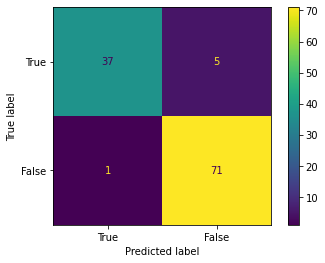

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])


cm_display.plot()
plt.show()

# **تم بحمدالله**